# Assignment 2 - Question 2
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q2.ipynb`.

## 2.0 Background about the dataset

TLDR: You have 4 independent variables (`float`) for each molecule. You can use a linear combination of these 4 independent variables to predict the bandgap (dependent variable) of each molecule.

You can read more about the problem in [Li et al, Bandgap tuning strategy by cations and halide ions of lead halide perovskites learned from machine learning, RSC Adv., 2021,11, 15688-15694](https://doi.org/10.1039/D1RA03117A).

In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import csv
import sys
import random
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
all_molecules = list()

#/content/gdrive/My Drive/SMAI/A2/
with open('bg_data.txt', 'r') as infile:
    input_rows = csv.DictReader(infile)
    
    for row in input_rows:
        current_mol = ([float(row['Cs']), float(row['FA']), float(row['Cl']), float(row['Br'])], float(row['Bandgap']))
        all_molecules.append(current_mol)

random.shuffle(all_molecules)


num_train = int(len(all_molecules) * 0.8)

# each point in x_train has 4 values - 1 for each feature
x_train = [x[0] for x in all_molecules[:num_train]]

# each point in y_train has 1 value - the bandgap of the molecule
y_train = [x[1] for x in all_molecules[:num_train]]

x_test = [x[0] for x in all_molecules[num_train:]]
y_test = [x[1] for x in all_molecules[num_train:]]



In [4]:
x_train = np.array([np.array(x) for x in x_train])
y_train = np.array([np.array(y) for y in y_train])
x_test = np.array([np.array(x) for x in x_test])
y_test = np.array([np.array(y) for y in y_test])

x_train.shape

(87, 4)

### 2.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

2.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

Linear Regression is a supervised Machine Learning algorithm. Following steps are involved for computing linear regressionL:
* Seperate Features (X) and target(y) variables.
* Intialized a weight matrix and bias to zero.
* Calculated predicted target value by performing matrix multiplication of weights and feature matrix + adding bias.
* Calculate the loss function and calculate dw and db are calculated using derivative of cost function w.r.t w and b respecitively.
* Update the weights and bias using gradient descent.
* Repeated the above steps for 1000 iterations.

We do pediction using  Y=WT*X (where WT is Transpose of W)<br>

We calculate MSE for different learning rates and learning rate where MSE is less is being used to plot parity plot.



<!-- your answer to 1.1.1 -->

2.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

2.1.2.1 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

In [5]:
# implement Linear Regression
class LinearRegression:
  def __init__(self, lr=0.01, num_iters=1000):
    self.lr = lr
    self.num_iters = num_iters
    self.weights = None
    self.bias = None

  def derivative(self,num_samples,X,y_predict,y):
    dw = (1/num_samples) * np.dot(X.T,(y_predict - y))
    db = (1/num_samples) * np.sum(y_predict - y)
    return dw,db

  def fit(self,X,y):
    num_samples, num_features = X.shape
    self.weights = np.zeros(num_features)
    self.bias = 0

    for i in range(self.num_iters):
      y_predict = np.dot(X,self.weights) + self.bias
      dw, db = self.derivative(num_samples,X,y_predict,y)
      
      #update weights and bias
      self.weights -= self.lr*dw
      self.bias -= self.lr * db
    
  def predict(self,X):
    y_predict = np.dot(X,self.weights) + self.bias
    return y_predict

#Cost Function
def mse(y_actual, y_pred):
  return np.mean((y_actual-y_pred)**2)

def rmse(y_actual,y_pred):
  return np.sqrt(np.mean((y_actual-y_pred)**2))
      

2.1.3 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

In [7]:
learning_rates = [0.01,0.05,0.1,0.3,0.5,0.6]
opt_lr = learning_rates[0]
min_mse = 100000
arr_mse = list()
for lr in learning_rates:
  model = LinearRegression(lr=lr,num_iters=1000)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  temp_error = mse(y_test,y_pred)
  if(temp_error<min_mse):
    min_mse = temp_error
    opt_lr = lr
  arr_mse.append(temp_error)


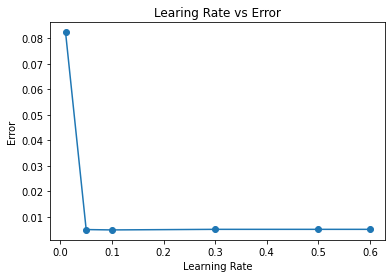

In [8]:
## Plot of mse vs learning rate
plt.plot(learning_rates,arr_mse, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Error')
plt.title("Learing Rate vs Error")
plt.show()

In [9]:
print("Optimum Learning Rate: " + str(opt_lr))
model = LinearRegression(lr=opt_lr,num_iters=1000)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)


Optimum Learning Rate: 0.1


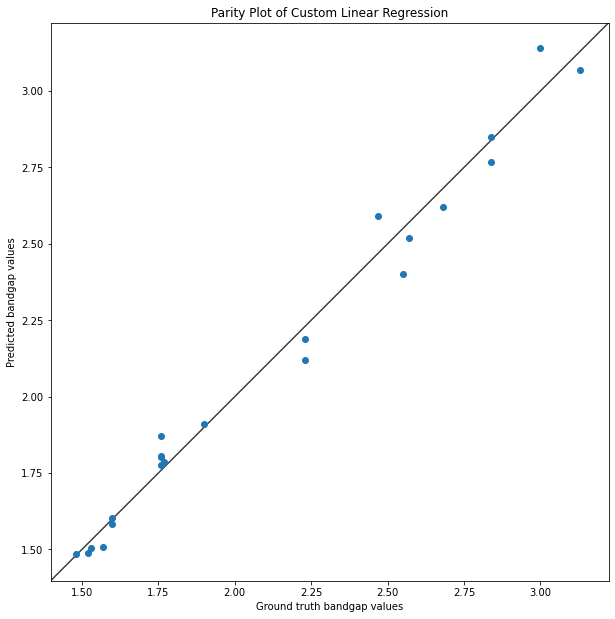

In [10]:
#
# ...
#
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,20))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()

### 2.2 Implement Ridge regression
2.2.1 Explain Ridge regression briefly in 1-2 lines.

<!-- Your answer to 1.2.1 -->

We use regularization for minimizing the overfitting of data by penalizing the learning.
Ridge Regression:
In ridge regression we performs L2 regularization, i.e. we add penalty equivalent to square of the magnitude of coefficients.<br>
Minimization objective = Least Squares(Without Regularization) + α * (sum of square of coefficients)

Additional term is called ridge penality and makes this function less sensitive towards training data.

2.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

In [11]:
# you should not have imported sklearn before this point
import sklearn

alphas = [0.001, 0.01, 0.1,0.5, 1, 10,100]
arr_rmse = list()
for alpha in alphas:
  model = Ridge(alpha=alpha,solver = 'saga')
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  temp_error = rmse(y_test,y_pred)
  arr_rmse.append(temp_error)

In [12]:
df = {}
df['Alpha'] = alphas
df['RMSE'] = arr_rmse
pd.DataFrame(df)

,Alpha,RMSE
0,0.001,0.071515
1,0.010,0.071417
2,0.100,0.070393
3,0.500,0.082641
4,1.000,0.110321
5,10.000,0.348668
6,100.000,0.531889


### 2.3 Implement Lasso regression
2.3.1 Explain Lasso regression briefly in 1-2 lines.

Lasso regression is similar to ridge regression and performs similar functionality, the only difference is that lasso uses L1 normalization i.e. absolute value of slope instead of squares of slope.<br>
Lasso regeression = Minimization objective = Least Squares(Without Regularization) + α * (abs(Slope))



2.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

In [13]:
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`
arr_rmse = list()
for alpha in alphas:
  model = Lasso(alpha=alpha)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  temp_error = rmse(y_test,y_pred)

  arr_rmse.append(temp_error)

In [14]:
df = {}
df['Alpha'] = alphas
df['RMSE'] = arr_rmse
pd.DataFrame(df)

,Alpha,RMSE
0,0.001,0.069740
1,0.010,0.103198
2,0.100,0.574524
3,0.500,0.574524
4,1.000,0.574524
5,10.000,0.574524
6,100.000,0.574524
